In [13]:
#importing necessary packages
import numpy as np
from scipy import stats 
import math

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from statsmodels.formula.api import ols

#importing pandas and the csv files
import pandas as pd
df = pd.read_csv('winemag-data_first150k.csv')

In [14]:
#looking at the shape and the length of the dataframe
df.shape

(150930, 11)

In [15]:
#checking the data
df.head(10)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


In [16]:
df.describe()

,Unnamed: 0,points,price
count,150930.000000,150930.000000,137235.000000
mean,75464.500000,87.888418,33.131482
std,43569.882402,3.222392,36.322536
min,0.000000,80.000000,4.000000
25%,37732.250000,86.000000,16.000000
50%,75464.500000,88.000000,24.000000
75%,113196.750000,90.000000,40.000000
max,150929.000000,100.000000,2300.000000


In [17]:
#counting the number of countries within the data frame
df.country.value_counts().head()

US        62397
Italy     23478
France    21098
Spain      8268
Chile      5816
Name: country, dtype: int64

In [18]:
#dropping the nan values within country and the price column
df.dropna(subset=['country','price'], inplace=True)

In [19]:
#checking the shape to check if the changes have been made
#about 20,000 rows with nan values have been removes
df.shape

(137230, 11)

In [20]:
#found an outlier within the data
df_US_FRA = df.country =='US-France'

In [21]:
#checking the amount of times this has appeared to check if it was an error
df_US_FRA.value_counts()

False    137229
True          1
Name: country, dtype: int64

In [22]:
#looking at the different types of countries within the country column
df.country.unique()

array(['US', 'Spain', 'France', 'Italy', 'New Zealand', 'Bulgaria',
       'Argentina', 'Australia', 'Portugal', 'Israel', 'South Africa',
       'Greece', 'Chile', 'Morocco', 'Romania', 'Germany', 'Canada',
       'Moldova', 'Hungary', 'Austria', 'Croatia', 'Slovenia', 'India',
       'Turkey', 'Macedonia', 'Lebanon', 'Serbia', 'Uruguay',
       'Switzerland', 'Albania', 'Bosnia and Herzegovina', 'Brazil',
       'Cyprus', 'Lithuania', 'Japan', 'China', 'South Korea', 'Ukraine',
       'England', 'Mexico', 'Georgia', 'Montenegro', 'Luxembourg',
       'Slovakia', 'Czech Republic', 'US-France'], dtype=object)

In [23]:
#creating a function that will check the countries within each of the rows and give the correct continent to it
#and also create a column titled 'continents' which display the correspoinding continent of the country within that row

#creating a list of continents with all the countries listed within the data frame
asia = ['Israel', 'Japan', 'China', 'South Korea']
europe = ['Spain', 'France', 'Italy', 'Bulgaria', 'Portugal','Greece', 'Romania', 'Germany', 
        'Moldova', 'Hungary', 'Austria', 'Croatia', 'Slovenia', 'India','Turkey', 'Macedonia', 'Lebanon',
        'Serbia','Switzerland', 'Albania', 'Bosnia and Herzegovina','Cyprus',
        'England','Ukraine','Georgia', 'Montenegro', 'Luxembourg', 'Slovakia', 'Czech Republic']
africa = ['South Africa', 'Morocco', 'Lithuania']
northAmerica = ['US', 'Canada','Mexico']
southAmerica = ['Argentina', 'Chile','Brazil', 'Uruguay']
oceania = ['New Zealand','Australia']
other = ['US-France']

#creating a function to display the corresponding continents
def GetContinent(c):
    if c in asia:
        return "Asia"
    elif c in northAmerica:
        return "North America"
    elif c in southAmerica:
        return "South America"
    elif c in oceania:
        return "Oceania"
    elif c in europe:
        return "Europe"
    elif c in africa:
        return "Africa"
    else:
        return "Other"

df['continent'] = df['country'].apply(lambda x: GetContinent(x))
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,continent
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,North America
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,Europe
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,North America
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,North America
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,Europe


In [24]:
#checking to see if the previous code had worked
df.continent.unique()

array(['North America', 'Europe', 'Oceania', 'South America', 'Asia',
       'Africa', 'Other'], dtype=object)

# <B> HYPOTHESIS

<b>Hypothesis 1:</b> Europe has higher mean price than the rest of the world
    <br>h0: Europe price mean = World price mean
    <br>ha: Europe price mean > World price mean
    
<b>Hypothesis 2:</b> Europe has higher rated wines
    <br>h0:Europe = World
    <br>ha: Europe > World
    
<b>Hypothsis 3:</b> Most of the top varietys of wines are produced in Europe
    <br>h0: Not in Europe
    <br>ha: in Europe

<BR><BR><BR>

<b>HYPOTHESIS 1

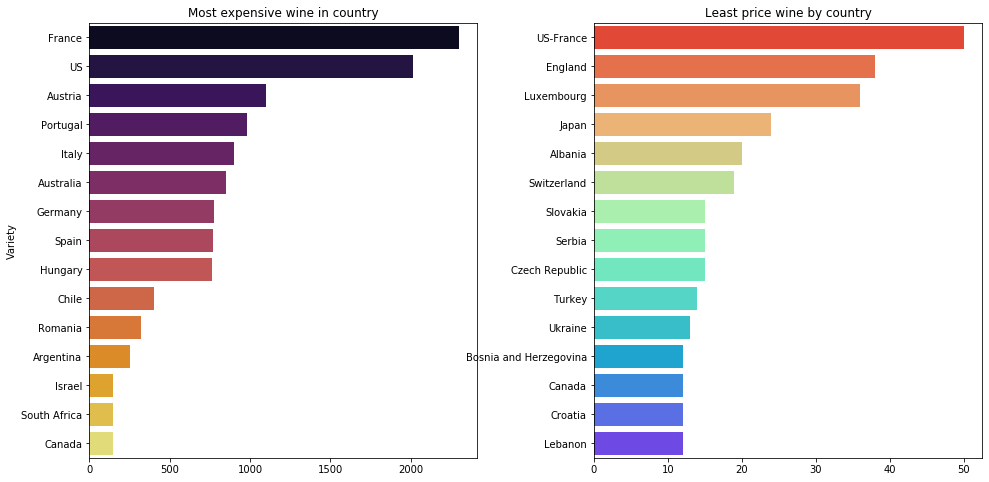

In [95]:
#Most expensive wines in countries
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

#graph 1
cnt = df.groupby(['country'])['price'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette= 'inferno',ax=ax1)
ax1.set_title('Most expensive wine in country')
ax1.set_ylabel('Variety')
ax1.set_xlabel('')

#graph 2
cnt = df.groupby(['country'])['price'].min().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette = 'rainbow_r',ax=ax2)
ax2.set_title('Least price wine by country')
ax2.set_ylabel('')
ax2.set_xlabel('')
plt.subplots_adjust(wspace=0.3);

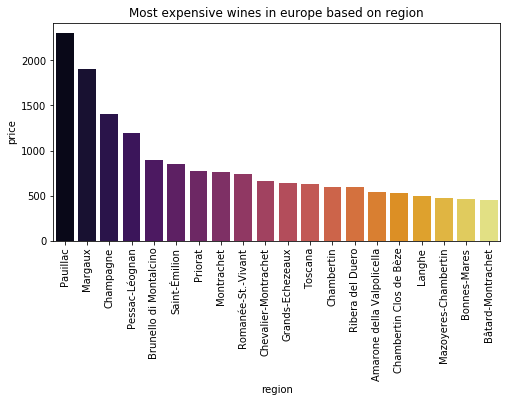

In [101]:
#Most expensive wines in europe based on the region
fig,ax = plt.subplots(1,1,figsize=(8,4))

cnt = dfEurope.groupby(['region_1'])['price'].max().sort_values(ascending=False).to_frame()[:20]
sns.barplot(y = cnt['price'], x = cnt.index, palette= 'inferno')
ax.set_title('Most expensive wines in europe based on region')
ax.set_ylabel('price')
plt.xticks(rotation= 'vertical') 
ax.set_xlabel('region')

plt.subplots_adjust(wspace=0.3);

In [26]:
#obtaining the mean price of wines within each continent
df.groupby(['continent'])['price'].mean().reset_index()

,continent,price
0,Africa,21.078866
1,Asia,31.113086
2,Europe,36.597164
3,North America,33.652237
4,Oceania,28.527248
5,Other,50.000000
6,South America,20.101021


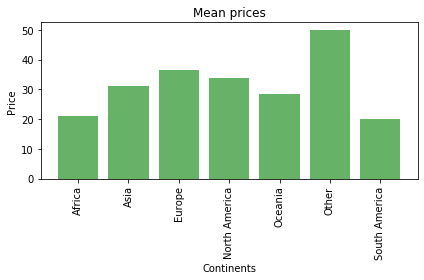

In [27]:
#a bar graph showing all the mean prices for the continents
list_of_continents = list(df['continent'].unique())
mean_price = {}
for continent in list_of_continents:
    mean_price[continent] = df['price'][df['continent'] == continent].mean()
list_mean = list(mean_price.items())
list_mean = sorted(list_mean)
indices = np.arange(len(list_mean))
x,y = zip(*list_mean)
plt.bar(indices, y, color='green', alpha = 0.6)
plt.xticks(indices, x, rotation= 'vertical') 
plt.title('Mean prices')
plt.xlabel('Continents')
plt.ylabel('Price')
plt.tight_layout()

In [28]:
#mean prices of each of the types of wines
df.groupby(['variety'])['price'].mean().reset_index().sort_values(by='price', ascending=True)

,variety,price
246,Macabeo-Moscatel,7.333333
380,Pigato,8.000000
90,Carineña,8.000000
71,Cabernet Sauvignon and Tinta Roriz,8.000000
598,Viura-Chardonnay,8.727273
...,...,...
303,Mission,82.571429
543,Tinto Fino,83.120000
288,Mazuelo,98.500000
325,Muscadel,141.300000


In [186]:
dfEurope=df.loc[df['continent']=='Europe']
dfOceania=df.loc[df['continent']=='Oceania']
dfAfrica=df.loc[df['continent']=='Africa']
dfUS=df.loc[df['continent']=='US']
dfAsia=df.loc[df['continent']=='Asia']

In [182]:
df.loc[(df.continent == 'Africa') & (df.points >= 90)]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,continent
216,216,Morocco,"Tones of black cherry, toffee, tobacco, tar an...",Domaine Excelcio,93,35.0,Guerrouane,NaN,NaN,Syrah-Grenache,Bernard Magrez,Africa
1749,1749,Morocco,"Deep ruby red to the eye, this red wine has a ...",NaN,90,18.0,Zenata,NaN,NaN,Syrah,Ouled Thaleb,Africa
4507,4507,Morocco,"From the first whiff of cherry, cranberry and ...",NaN,90,17.0,Zenata,NaN,NaN,Syrah,Ouled Thaleb,Africa
10607,10607,South Africa,One of the finest selections from South Africa...,Columella,95,130.0,Swartland,NaN,NaN,Rhône-style Red Blend,Sadie Family,Africa
11170,11170,South Africa,"A blend of 68% Shiraz, 18% Grenache, 10% Cinsa...",NaN,94,43.0,Swartland,NaN,NaN,Red Blend,A.A. Badenhorst Family Wines,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...
150593,150593,South Africa,"Lively, with brisk lime and herb aromas openin...",NaN,90,13.0,Stellenbosch,NaN,NaN,Sauvignon Blanc,Waterford,Africa
150596,150596,South Africa,"Displaying style and character, this mid-weigh...",NaN,90,17.0,Stellenbosch,NaN,NaN,Merlot,Jardin,Africa
150598,150598,South Africa,Just what Sauvignon Blanc should be. Fresh and...,NaN,90,13.0,Stellenbosch,NaN,NaN,Sauvignon Blanc,Simonsig,Africa
150599,150599,South Africa,Everything about this elegant Chardonnay says ...,NaN,90,15.0,Stellenbosch,NaN,NaN,Chardonnay,Waterford,Africa


In [183]:
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [170]:
control=np.asarray(dfEurope[['price']][:20].mean())
experimental=np.asarray(dfEurope[['points']][:20].mean())

Text(0.5, 1.0, 'Distrbution of price')

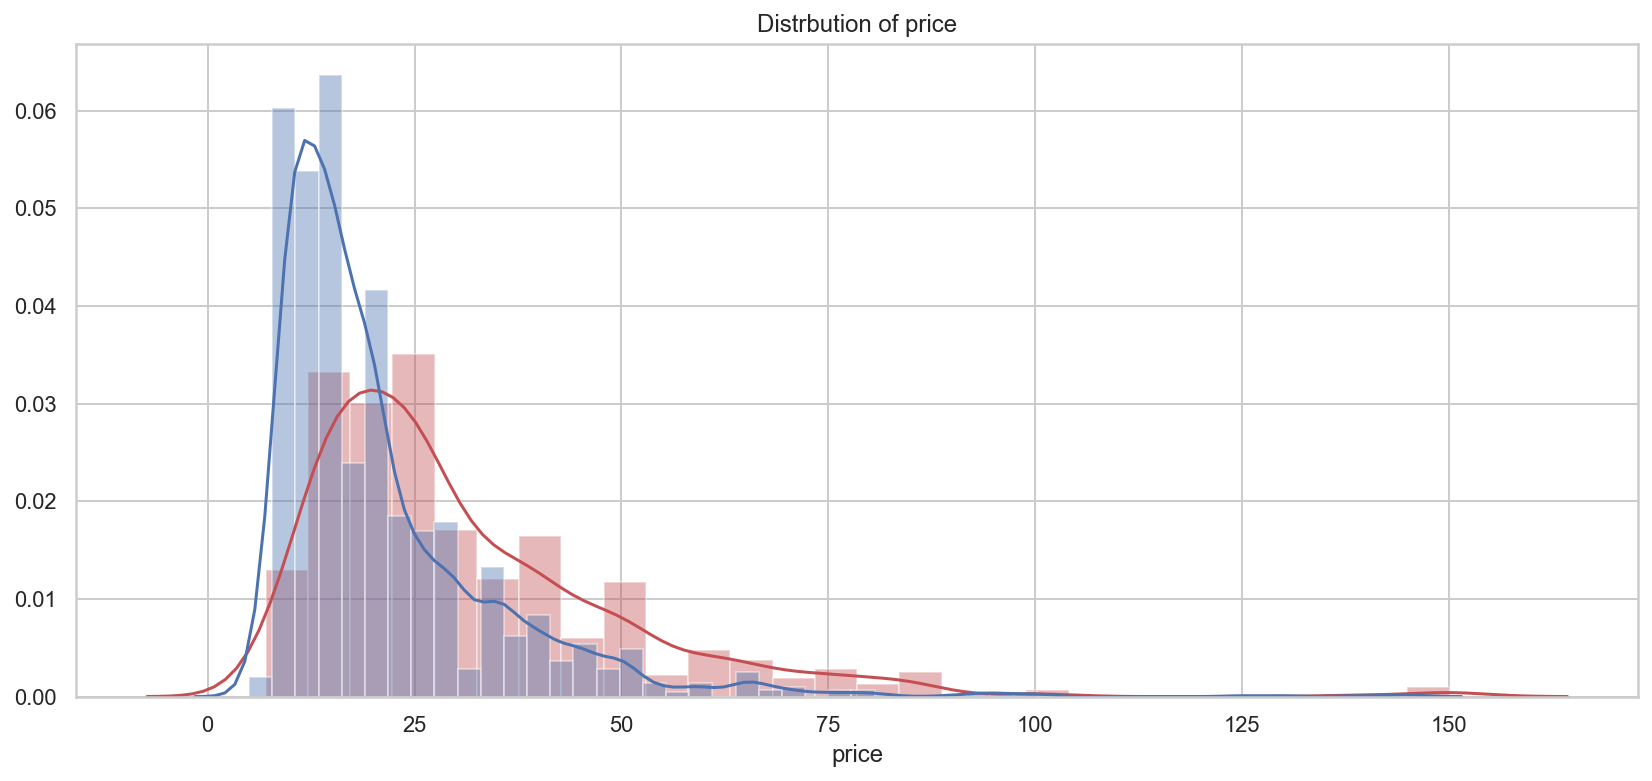

In [208]:
f, ax = plt.subplots(1,1,figsize=(14,6))
ax1 = ax
sns.distplot(dfAsia['price'].fillna(dfAsia['price'].mean()),color='r',ax=ax1)
sns.distplot(dfAfrica['price'].fillna(dfAfrica['price'].mean()),color='b',ax=ax1)
ax1.set_title('Distrbution of price')